Project: African Financial Crisis

Name: Michael Lee

Date Started: 10/01/2025

Reason:

This is my first machine learning project that's not a tutorial. Since Finances will be my specialty, I want to create vizuals and utilize machine learning to analyze and predict the data given.

Questions:

Two questions I want to explore?

* What factors are most associated with banking crises across African countries?
* Given past crises in each country, can we forecast the likelhood of a crisis within the next decade?

## About this file
This dataset is a derivative of Reinhart et. al's Global Financial Stability dataset which can be found online at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx

It specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe.

The dataset will be valuable to those who seek to understand the dynamics of financial stability within the African context.

In [1]:
# Prepare all libraries and imports for the library
import sklearn 
import numpy as np  # Math
import pandas as pd  # Read and pull tables
import matplotlib.pyplot as plt  # Provide low-level plotting
import plotly.express as px  # Interactive charts
import seaborn as sns  # Create pretty stat plots
import warnings  # Suppress library warning labels during exploring (not hiding errors)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)  # Set to true to load JS form Plotly's CDN - lighter and faster
%matplotlib inline

In [2]:
# Pull the data using Pandas
raw_df = pd.read_csv("african_crises.csv")
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [3]:
raw_df.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [4]:
raw_df.isnull().sum()  # Count if we have any NAN in our raw data - the data looks clean which makes it easy.

case                               0
cc3                                0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [5]:
# Let's first check how frequent banking crisis are in these countries (in proportions).
raw_df['banking_crisis'].value_counts(normalize=True)

banking_crisis
no_crisis    0.911237
crisis       0.088763
Name: proportion, dtype: float64

In [6]:
raw_df['banking_crisis'].value_counts(normalize=False)  # Raw count in frequency

banking_crisis
no_crisis    965
crisis        94
Name: count, dtype: int64

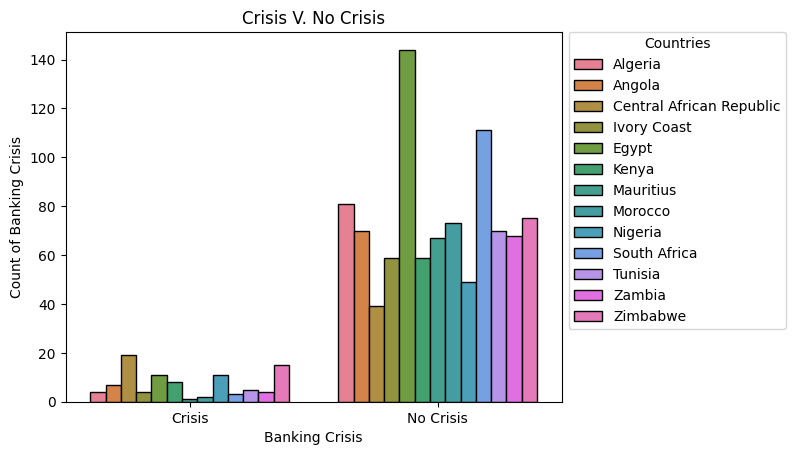

<Figure size 2000x2000 with 0 Axes>

In [7]:
# Let's make a  figure to explore the number of crisis.
sns.countplot(data=raw_df,
            x='banking_crisis',
            hue='country',
            edgecolor='black')
plt.title('Crisis V. No Crisis')
plt.xlabel('Banking Crisis')
plt.ylabel('Count of Banking Crisis')
plt.xticks([0,1],['Crisis', 'No Crisis'])
plt.legend(title='Countries',
           bbox_to_anchor=(1.0, 1.02),
           loc='upper left')
plt.figure(figsize=(20,20))
plt.tight_layout()
plt.show()

# We can see from the plot that it's more frequent for these African countries to not have a crisis.

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [9]:
# Let see if we can use a heat map to find where which categories collide to make the most correlation.
# Will run into an error if you don't get rid of the str columns.
    #  Note to self - Let's clean up the data a little and get rid of columns that are not floating or integers.
float_df = raw_df[['case',
                  'year',
                  'systemic_crisis',
                  'exch_usd',
                  'domestic_debt_in_default',
                  'sovereign_external_debt_default',
                  'gdp_weighted_default',
                  'inflation_annual_cpi',
                  'independence',
                  'currency_crises',
                  'inflation_crises',]]

float_df.head()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
0,1,1870,1,0.052264,0,0,0.0,3.441456,0,0,0
1,1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0
2,1,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0
3,1,1873,0,0.051680,0,0,0.0,11.203897,0,0,0
4,1,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0


<Axes: >

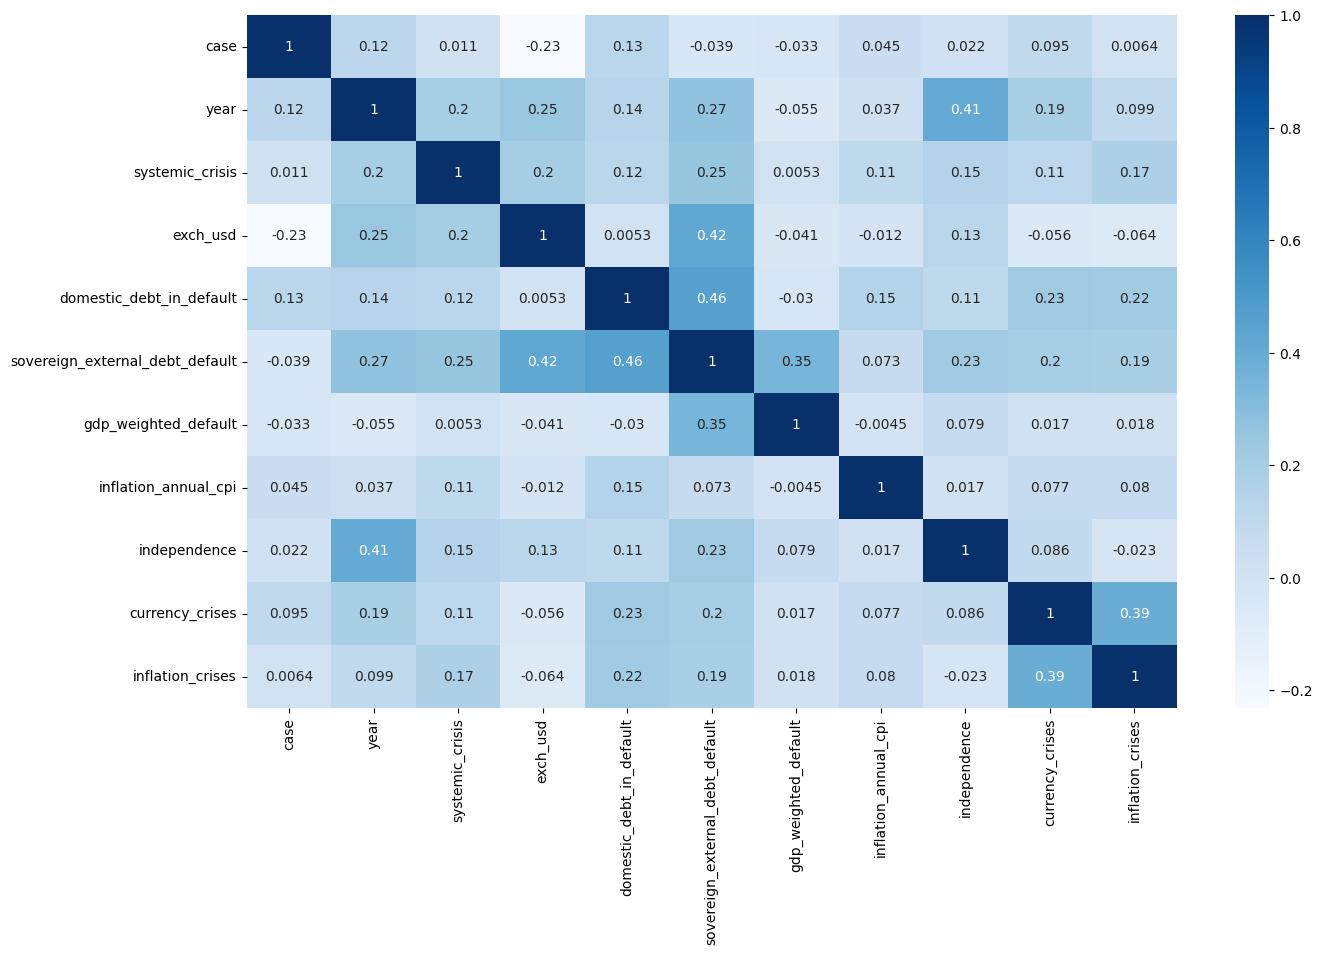

In [10]:
plt.figure(figsize=(15,9))
sns.heatmap(float_df.corr(), annot=True, cmap="Blues", cbar=True)

# Correlations - What to focus on

## Moderately Correlated Data:

Some categories seem to have strong correlation with each other. Let's explore to see if the weight of these categories could affect our give target (Crisis/No Crisis)

* Domestic Dept in Default & Sovereign External Debt Default
* Exchange USD & Sovereign External Debt Default
* Independence & Year

## Low Correlated Data:

Some categories may not have high coefficient relationships, but this doesn't deny the fact that certain classification does not affect a Financial crisis to happen.

* Inflation related variables: In theory, Hyperinflation is a well known classification for causing financial despair. Let's explore the 'Inflation Annual CPI (Consumer Price Index)'
* GDP is ususally a dictator to economic health. If the GDP was low for a certain country in a given year, could it also be a causatio to a crisis.


In [11]:
# Get a gist of what which contries suffer a banking_crisis
display(raw_df[['country','banking_crisis']].sort_values(by=['banking_crisis'],ascending=True).head(50))

,country,banking_crisis
0,Algeria,crisis
196,Central African Republic,crisis
197,Central African Republic,crisis
198,Central African Republic,crisis
199,Central African Republic,crisis
200,Central African Republic,crisis
201,Central African Republic,crisis
202,Central African Republic,crisis
203,Central African Republic,crisis
204,Central African Republic,crisis


In [12]:
# Pull 
clean_data = raw_df[['country',
                  'year',
                  'systemic_crisis',
                  'exch_usd',
                  'domestic_debt_in_default',
                  'sovereign_external_debt_default',
                  'gdp_weighted_default',
                  'inflation_annual_cpi',
                  'independence',
                  'currency_crises',
                  'inflation_crises',
                  'banking_crisis']]

clean_data

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...
1054,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


In [13]:
# Import sklearn class and it's functions to start you predictions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder  # Will split the categorical data into numericals.

In [14]:
# Split the clean dataset into Train, Validation, Test.
train_val_df, test_df = train_test_split(clean_data, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42)

We've now split the data into a Train, Validation, and Test Set. With the code above, the first split pulls from the clean_data df and ensure test_df is 20% of our data. The second split take the remaining set (train_val_df) and splits it into a validation set and training set. With the validation set being 25% of the whole data.

In [15]:
# Use the .shape method from numpy to find the row and columns. Always ensure data is even.
print(f'train_df.shape: {train_df.shape}')
print(f'val_df.shape: {val_df.shape}')
print(f'test_df.shape: {test_df.shape}')

train_df.shape: (635, 12)
val_df.shape: (212, 12)
test_df.shape: (212, 12)


In [16]:
# Since we are working with dates - which is needed to make predicitive models.
# Split the 'years' column as well
pd.set_option('display.max_rows', None)
clean_data['year'].sort_values(ascending=True).value_counts()

year
2012    13
1980    13
1979    13
1975    13
1976    13
1977    13
1974    13
1971    13
1972    13
1973    13
1970    13
1999    13
2000    13
2001    13
2002    13
2003    13
2004    13
2005    13
2006    13
2007    13
1992    13
1994    13
1993    13
1997    13
1996    13
1998    13
1995    13
1959    13
1960    13
1978    13
1961    13
1958    13
1957    13
2008    13
2011    13
2010    13
2009    13
2013    13
1955    12
1990    12
1989    12
1956    12
1954    12
1986    12
1991    12
1988    12
1987    12
1984    12
1985    12
1983    12
1962    12
1981    12
1969    12
1982    12
1968    12
1963    11
2014    11
1964    11
1953    11
1967    11
1952    11
1965    11
1966    11
1950    10
1948    10
1951    10
1949    10
1947     9
1946     8
1944     8
1945     8
1943     8
1942     7
1941     7
1940     7
1939     5
1937     4
1938     4
1936     4
1935     4
1927     4
1929     4
1928     4
1932     4
1934     4
1933     4
1930     4
1922     4
1921     4
1923     4
1931 

In [38]:
print(clean_data['year'].min())
print(clean_data['year'].max())

1860
2014


In [60]:
# Since we are forcasting for a predictive future, let's use a train,val,test set with years instead.

train_df = clean_data[clean_data['year'] < 2000]  # Training set is anything before 2000
val_df = clean_data[(clean_data['year'] > 2000) & (clean_data['year'] <= 2011)]  # Validation set is between 2000 and 2011
test_df = clean_data[clean_data['year'] > 2011]  # Last three years would be our test set 2011-2014. 

In [61]:
print(f'train_df.shape: {train_df.shape}')
print(f'val_df.shape: {val_df.shape}')
print(f'test_df.shape: {test_df.shape}')

train_df.shape: (866, 12)
val_df.shape: (143, 12)
test_df.shape: (37, 12)


# OneHotEncoder:

Machine learning can only utilize numerics. Our target (Crisis or No Crisis) is a categorical column. OneHotEncoder from the preprocessing module, can be use to turn Categorical data into numerical inputs. The following numerical representations will represet our targets - 

1 0: "Crisis'

0 1: "No Crisis".

In [64]:
# Pull in the function for OneHotEncoder from the Preprocessing module
from sklearn.preprocessing import OneHotEncoder

In [67]:
clean_data['banking_crisis'].nunique()  # Check how many 'unique' categories of banking crisis options

2

In [68]:
# Assign the function to a variable
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [83]:
ohe_crisis = encoder.fit_transform(clean_data[['banking_crisis']])  # Transform that column into numerics
ohe_crisis

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], shape=(1059, 2))

In [82]:
encoder.categories_  # Confirm the identity of the listed items.

[array(['crisis', 'no_crisis'], dtype=object)]

In [89]:
# Currently 'ohe_crisis' is in an numpy array - turn it into a panda dataframe
# Concatenation the two would not work otherwise.
ohe_crisis = pd.DataFrame(data=ohe_crisis)

In [93]:
# Concatenate the two data frames - this will allow us to run the df with models now
# Use .drop() method to remove the old column - it's redundant and no longer useful
ohe_df = pd.concat([clean_data, ohe_crisis], axis=1).drop(columns=['banking_crisis'])
ohe_df.head(10)

,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,0,1
0,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,1.0,0.0
1,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,0.0,1.0
2,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,0.0,1.0
3,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,0.0,1.0
4,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,0.0,1.0
5,Algeria,1875,0,0.051546,0,0,0.0,-20.924178,0,0,0,0.0,1.0
6,Algeria,1876,0,0.051867,0,0,0.0,-1.769547,0,0,0,0.0,1.0
7,Algeria,1877,0,0.051867,0,0,0.0,29.116045,0,0,1,0.0,1.0
8,Algeria,1878,0,0.051948,0,0,0.0,-1.492537,0,0,0,0.0,1.0
9,Algeria,1879,0,0.052029,0,0,0.0,-16.831357,0,0,0,0.0,1.0


# Logistic Regression Model:

## My Approach:

Since we are looking for a 'binary' outcome (Crisis or No Crisis) a good first step is to explore a logistic regression model. 

In [94]:
from sklearn.linear_model import LogisticRegression


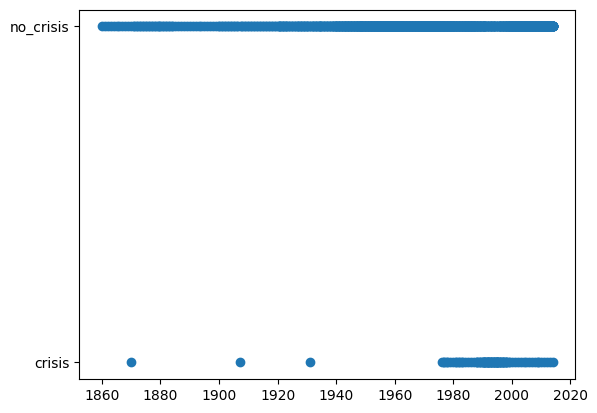

In [98]:
plt.scatter(ohe_df['year'], clean_data['banking_crisis'])